In [5]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
suppressMessages(library(class))
library(tree)

In [6]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')
setwd("C:/Users/sole-/Documents/Tecnologia/Sexto semestre/Temas compu")
cv=read.csv("covid.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)
cv$FECHA_DEF = ifelse(cv$FECHA_DEF !="9999-99-99",1,0)

p = cv %>% filter(FECHA_DEF == 0) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(FECHA_DEF == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(FECHA_DEF == 0)
cv_covid_positivo = cv %>% filter(FECHA_DEF == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)#50% que han muerto y 50% que estan vivos

#str(cv)
cv$FECHA_DEF <- as.factor(cv$FECHA_DEF)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_DEF = as.factor(cv$FECHA_DEF)
attach(cv)
#str(cv)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + 
    DIABETES + EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, 
    family = "binomial", data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.14701  -0.42124   0.08631   0.57111   2.74859  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.22265    0.26616   4.594 4.35e-06 ***
SEXO2            0.36695    0.05124   7.161 8.00e-13 ***
NEUMONIA2       -1.41331    0.05553 -25.450  < 2e-16 ***
OBESIDAD2       -0.35961    0.05876  -6.120 9.33e-10 ***
OBESIDAD98      -0.27563    0.39950  -0.690   0.4902    
HIPERTENSION2   -0.27780    0.05794  -4.795 1.63e-06 ***
HIPERTENSION98  -1.36538    0.77648  -1.758   0.0787 .  
DIABETES2       -0.37003    0.05854  -6.321 2.59e-10 ***
DIABETES98      -0.60160    0.57025  -1.055   0.2914    
EDAD             0.04803    0.00178  26.987  < 2e-16 ***
INTUBAD

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.35

[1] 0.8496826

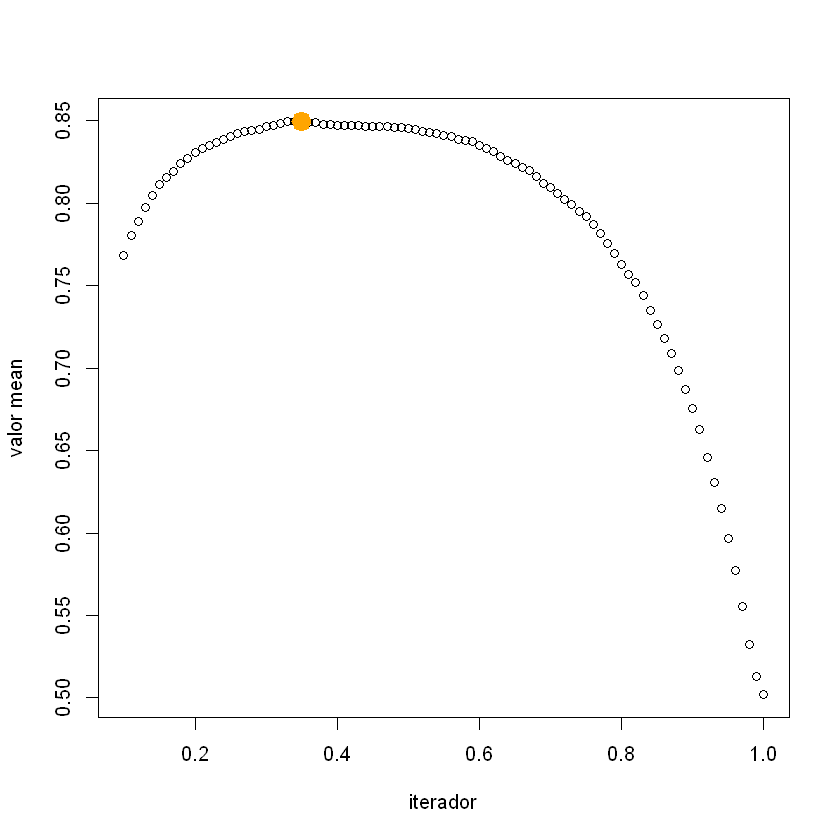

In [7]:
##########LOGISTIC######
  glm1<- glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = Train)
  summary(glm1)
  yhat2<- predict(glm1, Test,type="response")
  #para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
  #se repite 91 veces 
  size=1
  val_mean <- rep(0,91)
  for(i in seq(0.1,1,by=0.01)){
    y=as.integer(yhat2>i)
    y=ifelse(y =="0",0,1)
    val_mean[size]=mean(y == Test$FECHA_DEF)
    size=size+1
  }
  size=2
  lugar=1
  mejor=val_mean[lugar]
  for(i in seq(0.11,1,by=0.01)){
    if(val_mean[size]>mejor){
      mejor=val_mean[size]
      b=i
      lugar=size
    }
    size=size+1
  }
  y=seq(0.1,1,by=0.01)
  plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
  points(b, val_mean[lugar],  col = "orange", lwd = 10)
 ###valores elegidos
   b
  val_mean[lugar]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misl

[1] 0.8491366

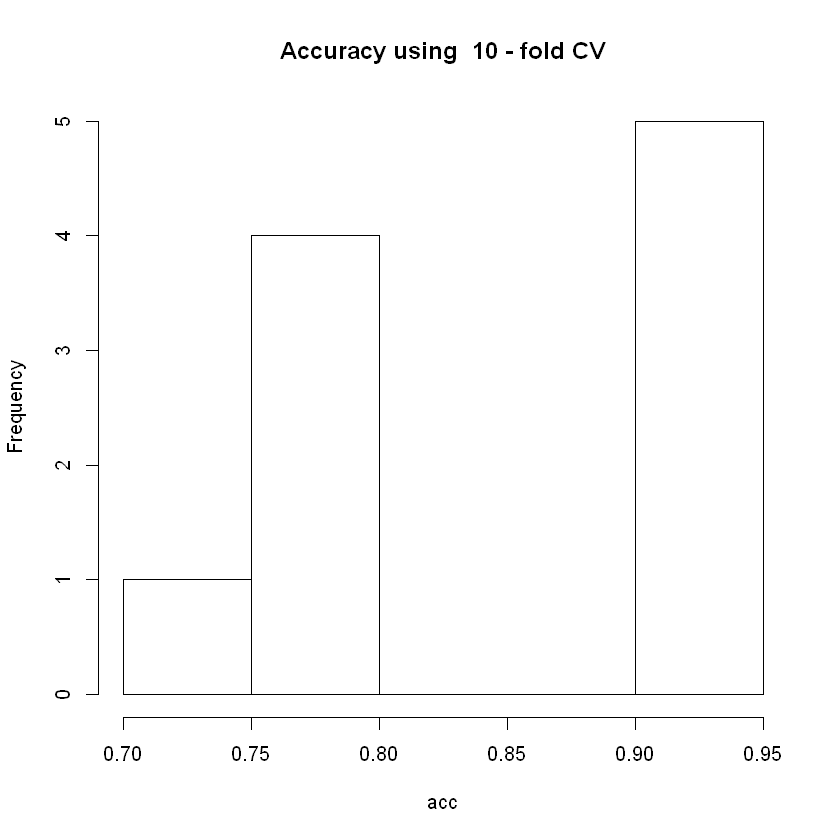

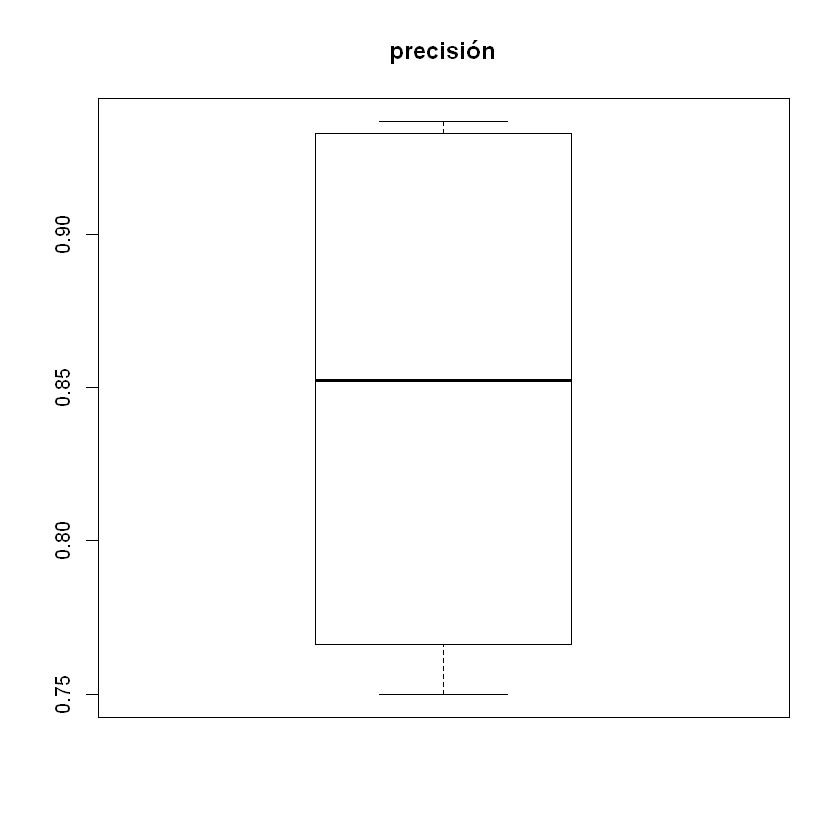

In [8]:
#################### k-folds glm
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <-glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,1,0) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")



In [9]:
#######LDA#####
lda1 <- lda(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = Train)
yhat1 <- predict(lda1, Test)$class
table(yhat1,Test$FECHA_DEF)
mean(yhat1 == Test$FECHA_DEF)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"


     
yhat1    0    1
    0 5809  748
    1 1545 6547

[1] 0.8434705

Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"


[1] 0.8418324

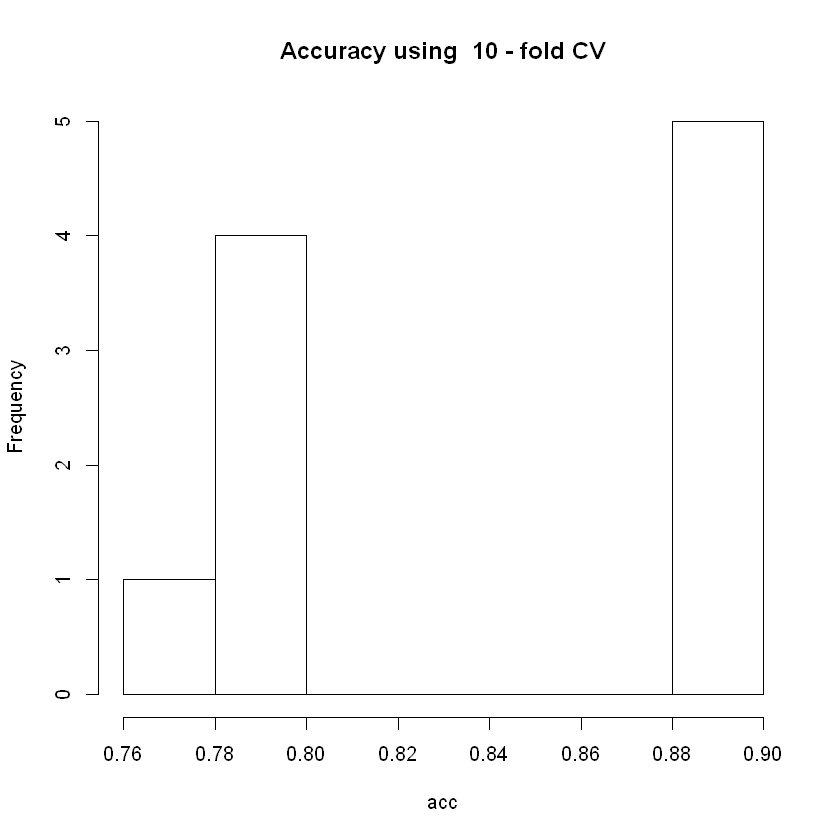

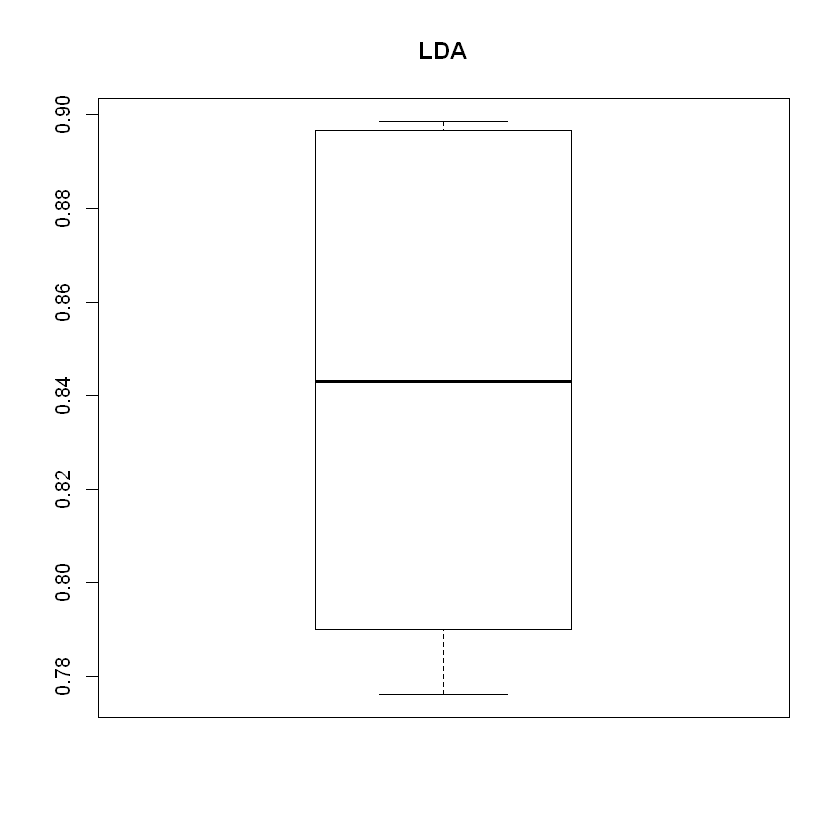

In [10]:
######kfolds lda
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")

[1] "la mejor k fue: "


[1] 12

[1] 0.841013

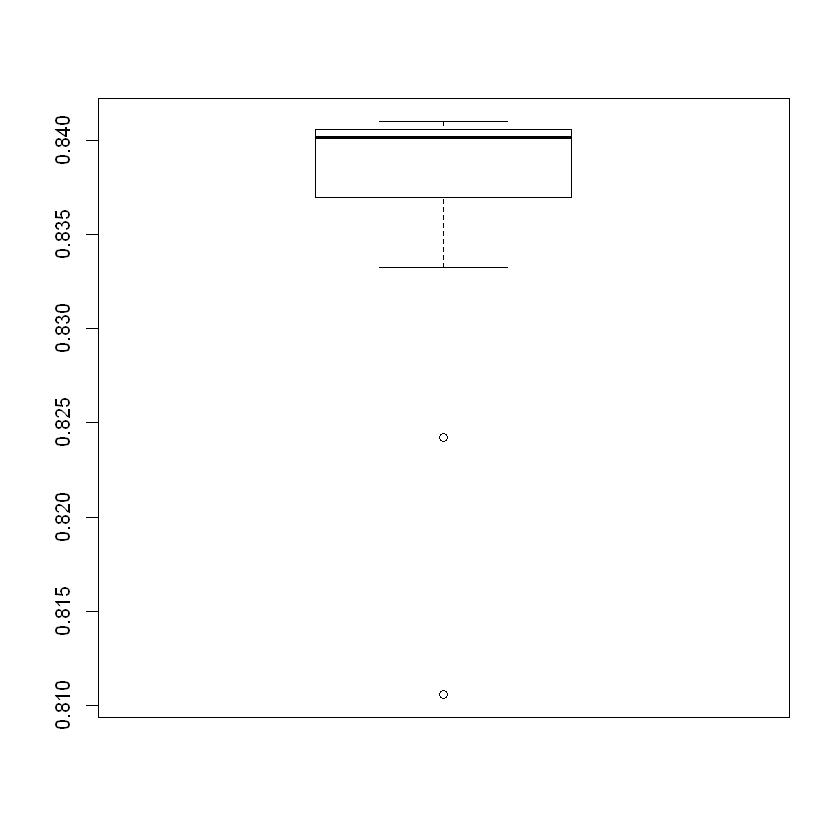

In [11]:
#############KNN#####
knn_val <- rep(1:20)
end= nrow(cv_covid_positivo)#numero de valores
mayor=0
for(n in 1:20){
  knn.pred <- knn(cbind(Train$SEXO,Train$NEUMONIA,Train$OBESIDAD,Train$HIPERTENSION,Train$DIABETES,
                        Train$EDAD,Train$INTUBADO,Train$UCI,Train$EPOC,Train$OTRO_CASO,Train$OTRA_CON), 
                  cbind(Test$SEXO,Test$NEUMONIA,Test$OBESIDAD,Test$HIPERTENSION,Test$DIABETES,
                        Test$EDAD,Test$INTUBADO,Test$UCI,Test$EPOC,Test$OTRO_CASO,Test$OTRA_CON), 
                  Train$FECHA_DEF, k=n)
  error= mean(Test$FECHA_DEF == knn.pred)
  knn_val[n]=error
  if(error>mayor){
    mayor=error
    k_best=n
  }
}
print("la mejor k fue: ")
k_best
mayor   
boxplot(knn_val)


Classification tree:
tree(formula = FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + 
    DIABETES + EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, 
    data = Train)
Variables actually used in tree construction:
[1] "INTUBADO" "NEUMONIA" "EDAD"    
Number of terminal nodes:  6 
Residual mean deviance:  0.7544 = 11050 / 14640 
Misclassification error rate: 0.1647 = 2413 / 14649 

         
tree.pred    0    1
        0 5262  322
        1 2092 6973

[1] 0.8352106

[1] "size"   "dev"    "k"      "method"

$size
[1] 6 3 2 1

$dev
[1] 2413 2413 2663 7358

$k
[1] -Inf    0  250 4632

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

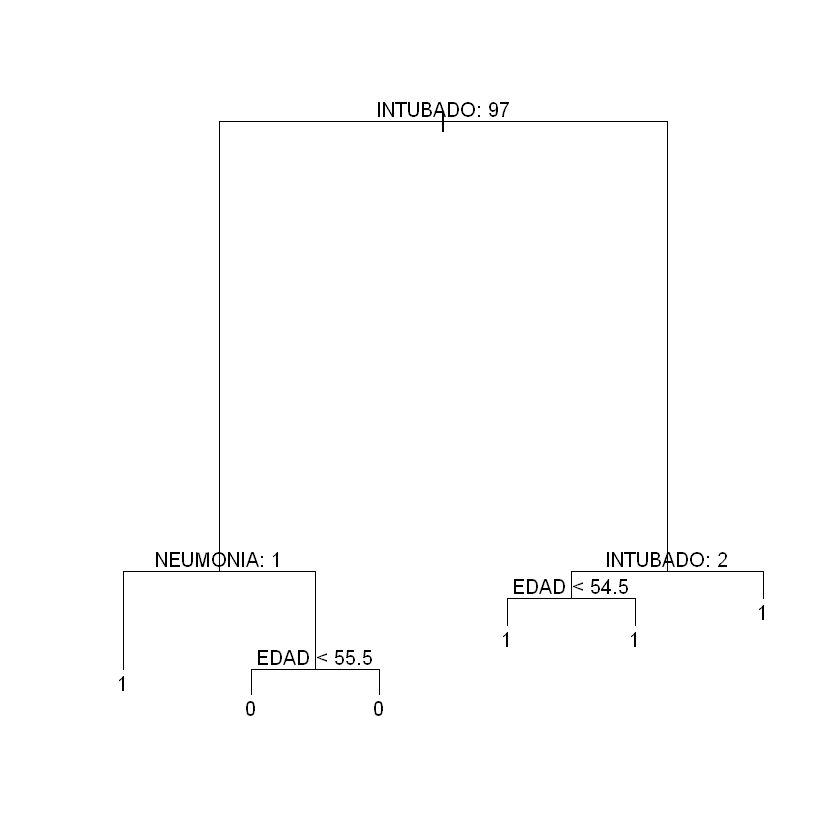

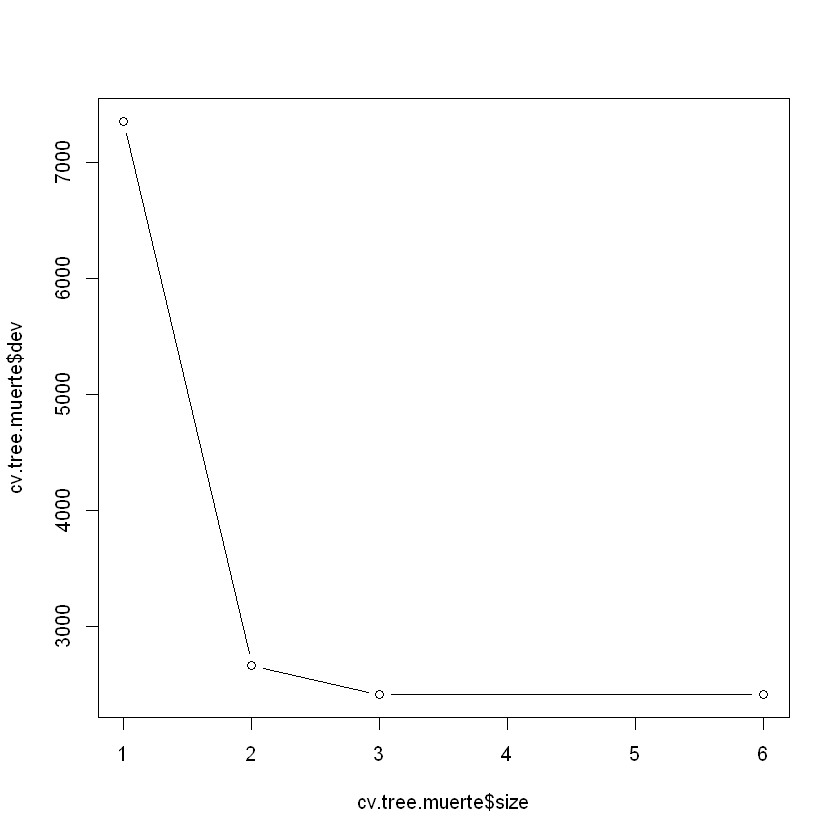

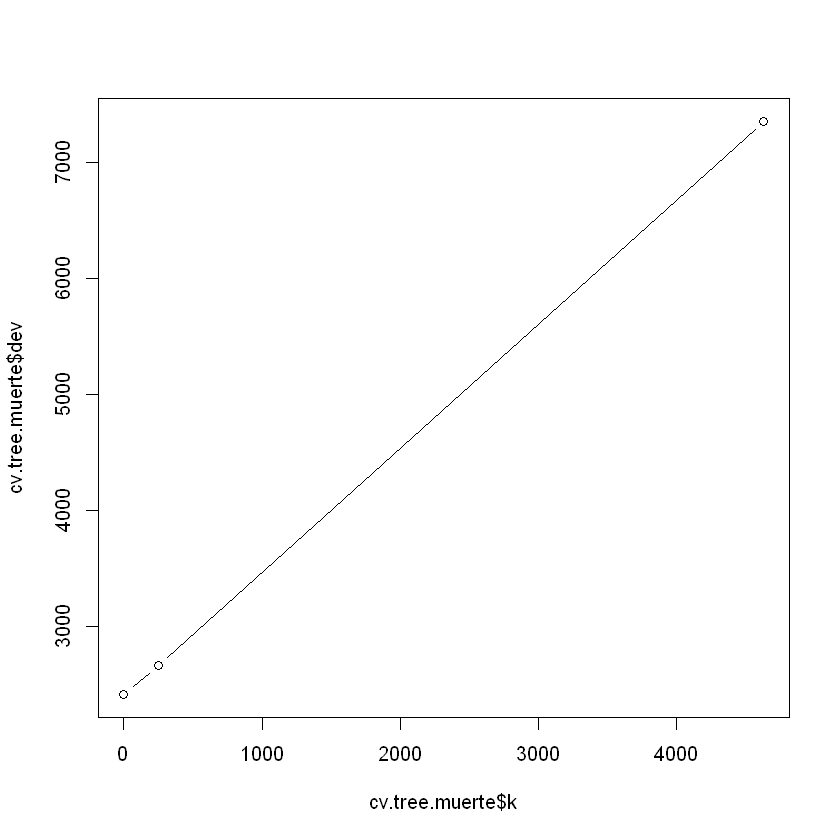

In [12]:
######## desicion tree####
tree.muerte = tree(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,data = Train)
summary(tree.muerte)
plot(tree.muerte)
text(tree.muerte, pretty=0)
tree.pred = predict(tree.muerte, Test, type="class")
table(tree.pred,Test$FECHA_DEF)
mean(tree.pred==Test$FECHA_DEF)

cv.tree.muerte = cv.tree(tree.muerte, FUN = prune.misclass)
names(cv.tree.muerte)
cv.tree.muerte
plot(cv.tree.muerte$size, cv.tree.muerte$dev,type="b")
plot(cv.tree.muerte$k,cv.tree.muerte$dev,type="b")


[1] 0.835245

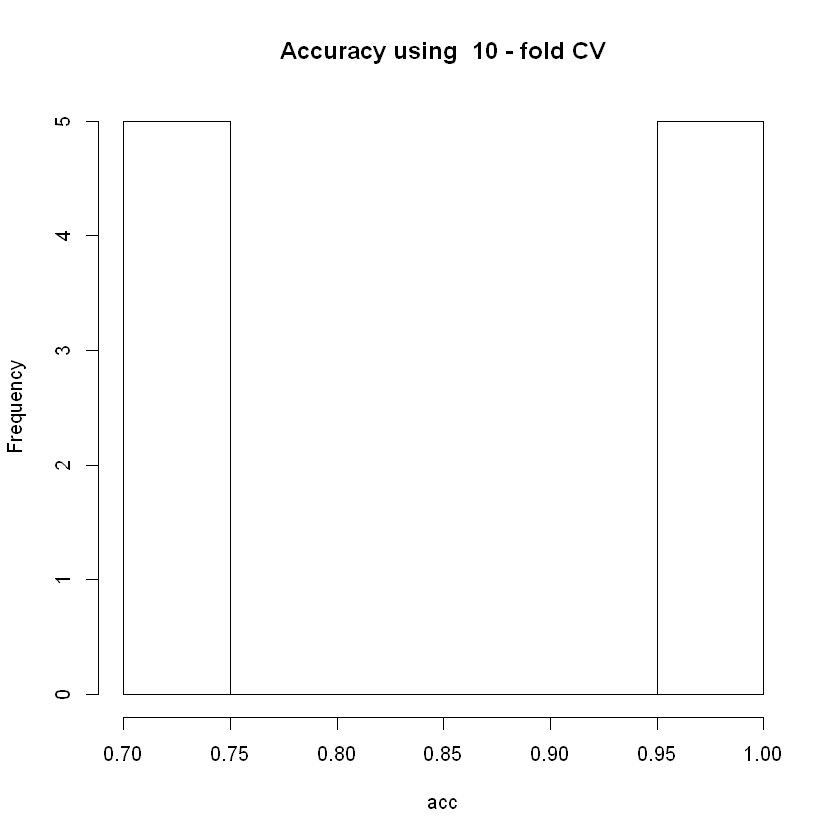

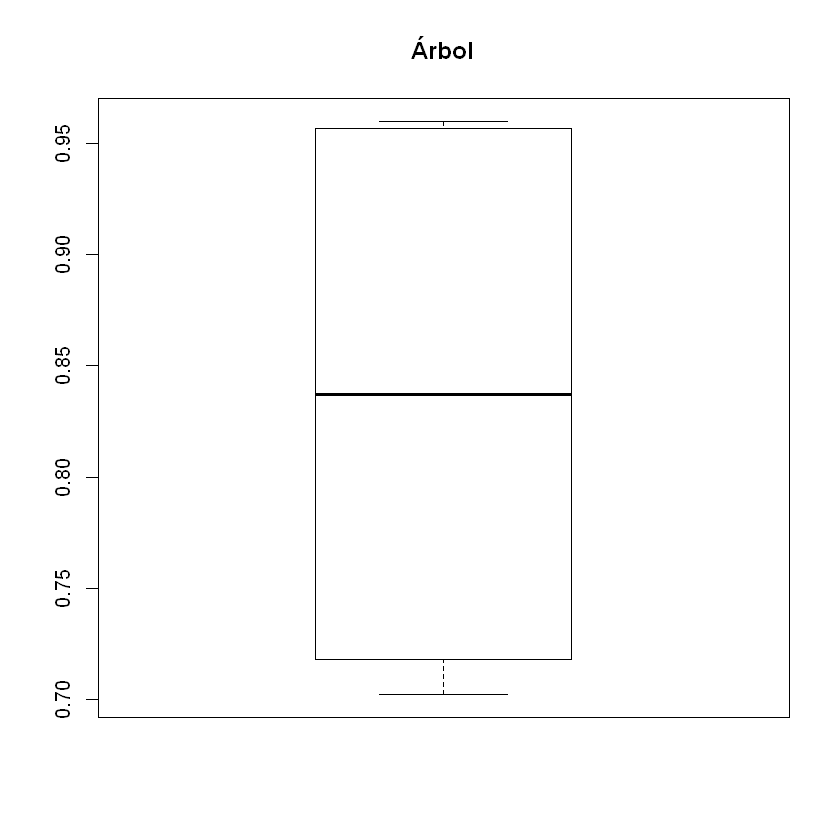

In [13]:
#######kfolds desicion tree
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg =tree(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test, type="class") #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="Árbol",xlabel="Precisión")